<a href="https://colab.research.google.com/github/HajarAlnamshan/MagFace/blob/main/Copy_of_2_Face_Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/Ruqyai/dataset/master/haarcascade_frontalface_default.xml

--2020-04-04 17:48:50--  https://raw.githubusercontent.com/Ruqyai/dataset/master/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.07s   

2020-04-04 17:48:50 (11.9 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



##Pre-trained model

In [ ]:
!wget https://github.com/Ruqyai/dataset/raw/master/_mini_XCEPTION.106-0.65.hdf5

--2020-04-04 17:48:54--  https://github.com/Ruqyai/dataset/raw/master/_mini_XCEPTION.106-0.65.hdf5
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Ruqyai/dataset/master/_mini_XCEPTION.106-0.65.hdf5 [following]
--2020-04-04 17:48:55--  https://raw.githubusercontent.com/Ruqyai/dataset/master/_mini_XCEPTION.106-0.65.hdf5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 897992 (877K) [application/octet-stream]
Saving to: ‘_mini_XCEPTION.106-0.65.hdf5’

_mini_XCEPTION.106- 100%[===================>] 876.95K  --.-KB/s    in 0.07s   

2020-04-04 17:48:55 (11.5 MB/s) - ‘_mini_XCEPTION.106-0.65.hdf5’ saved [89

##Upload an image

In [ ]:
from google.colab import files
img_name = files.upload()

Saving happy3.jpeg to happy3.jpeg


## Let us start

In [ ]:
%tensorflow_version 1.x

from keras.preprocessing.image import img_to_array #for converting a loaded image in PIL format into a NumPy array for use with deep learning models.
from keras.models import load_model
import imutils #basic image processing functions such as translation, rotation, resizing ...

import cv2
import numpy as np
import matplotlib.pyplot as plt

# parameters for loading data and images
detection_model_path = 'haarcascade_frontalface_default.xml'  # for detecting faces
emotion_model_path = '_mini_XCEPTION.106-0.65.hdf5'  #pretrained modle
img_path = list(img_name)[0]  

# hyper-parameters for bounding boxes shape
# loading models
face_detection = cv2.CascadeClassifier(detection_model_path)
emotion_classifier = load_model(emotion_model_path, compile=False)  # loading the pretrained modle from the path

EMOTIONS = ["angry","disgust","scared", "happy", "sad", "surprised","neutral"] # used as lable

#reading image
orig_img = cv2.imread(img_path) 
gray_img = cv2.imread(img_path,0) # grayscale
faces = face_detection.detectMultiScale(gray_img,scaleFactor=1.1,minNeighbors=5,minSize=(30,30),flags=cv2.CASCADE_SCALE_IMAGE)


TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
if len(faces) > 0:
    faces = sorted(faces, reverse=True,key=lambda x: (x[2] - x[0]) * (x[3] - x[1]))[0]
    (fX, fY, fW, fH) = faces
    roi = gray_img[fY:fY + fH, fX:fX + fW]
    roi = cv2.resize(roi, (48, 48))
    roi = roi.astype("float") / 255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi, axis=0)
    preds = emotion_classifier.predict(roi)[0]
    emotion_probability = np.max(preds)
    label = EMOTIONS[preds.argmax()]
    cv2.putText(orig_img, label, (fX, fY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
    cv2.rectangle(orig_img, (fX, fY), (fX + fW, fY + fH),(0, 0, 255), 2)


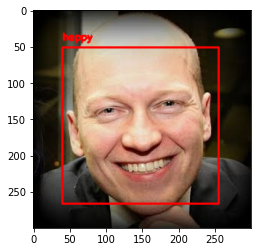

happy


In [ ]:
plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.show()
print(label)